# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.


In [47]:
# !git clone https://github.com/ultralytics/yolov5  # clone - reference

%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 2e0b773 Python-3.10.4 torch-1.12.1+cu102 CPU


Setup complete ✅ (8 CPUs, 15.4 GB RAM, 59.7/233.2 GB disk)


# Training

used yolov5s weights and New yaml file(mentioned 5 classes and path for 5 classes of labeled images approx 35 to 40 images from each class)

used https://www.makesense.ai/ for labeling

## Trainig will be much faster with GPUs

 - better use colab if no GPU in system (create all necessay requirments in a folder including training images and push to git hub)
 - clone git hub repo to colab and start training (much faster - uploding trainig images or zip to cloab might take more time) 
                                                   

In [ ]:
!python train.py --img 640 --batch 15 --epochs 105 --data Nplate.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=Nplate.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=105, batch_size=15, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
default message here: github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-8-29 Python-3.9.12 torch-1.12.1+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

      5/104         0G    0.07757      0.018    0.04534         11        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26    0.00269      0.667     0.0178    0.00437

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      6/104         0G    0.07297    0.01782    0.04415          8        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26    0.00369      0.927      0.118     0.0335

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      7/104         0G    0.07158    0.01787    0.04466         11        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26    0.00387      0.927     0.0605      0.014

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      8/10

     30/104         0G     0.0415   0.008856    0.01385         16        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.756      0.798      0.877      0.456

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     31/104         0G    0.03984   0.008943      0.013         14        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.698      0.862      0.767      0.399

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     32/104         0G    0.04234   0.008857    0.01078         14        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.766      0.834      0.881      0.457

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     33/10

     55/104         0G    0.02896    0.00695   0.003211         12        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.915      0.912      0.977      0.601

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     56/104         0G    0.02996   0.007088   0.003171          9        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.904      0.981      0.988      0.561

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     57/104         0G    0.03109   0.007213   0.002912         13        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.876      0.991      0.975      0.621

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     58/10

     80/104         0G    0.02107   0.005646   0.001944         19        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26       0.89      0.992      0.995      0.646

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     81/104         0G    0.02218   0.005808   0.001968          7        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26      0.896      0.991      0.995      0.656

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     82/104         0G     0.0224    0.00623     0.0018         22        640: 1
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26        0.9      0.989      0.995      0.662

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     83/10

In [17]:
# !pip install easyocr

## created custom detect file (detect_test.py)
 - will read the plate and wirte (append) to csv format (image name, plate and class) - used easyocr
 - automatically save the cropped/detected images to detected_imgs folder
 - also we can use the following arguments from default file to store images, save text, visualize etc.. for each runs
        
    parser.add_argument('--weights', nargs='+', type=str, default='runs/train/exp/weights/best.pt', help='model path(s)')
    
    parser.add_argument('--source', type=str, default= 0, help='file/dir/URL/glob, 0 for webcam')
    
    parser.add_argument('--data', type=str, default='data/Nplate.yaml', help='(optional) dataset.yaml path')
    
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    
    parser.add_argument('--view-img', action='store_true', help='show results')
    
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    
    parser.add_argument('--update', action='store_true', help='update all models')
    
    parser.add_argument('--project', default='runs/detect', help='save results to project/name')
    
    parser.add_argument('--name', default='exp', help='save results to project/name')
    
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')

In [1]:
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
"""
Run YOLOv5 detection inference on images, videos, directories, globs, YouTube, webcam, streams, etc.

Usage - sources:
    $ python detect.py --weights yolov5s.pt --source 0                               # webcam
                                                     img.jpg                         # image
                                                     vid.mp4                         # video
                                                     path/                           # directory
                                                     'path/*.jpg'                    # glob
                                                     'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                                                     'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream

Usage - formats:
    $ python detect.py --weights yolov5s.pt                 # PyTorch
                                 yolov5s.torchscript        # TorchScript
                                 yolov5s.onnx               # ONNX Runtime or OpenCV DNN with --dnn
                                 yolov5s.xml                # OpenVINO
                                 yolov5s.engine             # TensorRT
                                 yolov5s.mlmodel            # CoreML (macOS-only)
                                 yolov5s_saved_model        # TensorFlow SavedModel
                                 yolov5s.pb                 # TensorFlow GraphDef
                                 yolov5s.tflite             # TensorFlow Lite
                                 yolov5s_edgetpu.tflite     # TensorFlow Edge TPU
"""
import cv2
import pytesseract
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import argparse
import os
import platform
import sys
from pathlib import Path
import csv
import uuid

import torch
import torch.backends.cudnn as cudnn

# FILE = Path(__file__).resolve()
# ROOT = FILE.parents[0]  # YOLOv5 root directory
# if str(ROOT) not in sys.path:
#     sys.path.append(str(ROOT))  # add ROOT to PATH
# ROOT = Path(os.path.relpath(ROOT, Path.cwd()))  # relative

from models.common import DetectMultiBackend
from utils.dataloaders import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, Profile, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, smart_inference_mode


@smart_inference_mode()
def run(
        weights='runs/train/exp/weights/best.pt',  # model.pt path(s)
        source='../test_images/',  # file/dir/URL/glob, 0 for webcam
        data= 'data/Nplate.yaml',  # dataset.yaml path
        imgsz=(640, 640),  # inference size (height, width)
        conf_thres=0.25,  # confidence threshold
        iou_thres=0.45,  # NMS IOU threshold
        max_det=1000,  # maximum detections per image
        device='',  # cuda device, i.e. 0 or 0,1,2,3 or cpu
        view_img=False,  # show results
        save_txt=False,  # save results to *.txt
        save_conf=False,  # save confidences in --save-txt labels
        save_crop=False,  # save cropped prediction boxes
        nosave=False,  # do not save images/videos
        classes=None,  # filter by class: --class 0, or --class 0 2 3
        agnostic_nms=False,  # class-agnostic NMS
        augment=False,  # augmented inference
        visualize=False,  # visualize features
        update=False,  # update all models
        project='runs/detect',  # save results to project/name
        name='exp',  # save results to project/name
        exist_ok=False,  # existing project/name ok, do not increment
        line_thickness=3,  # bounding box thickness (pixels)
        hide_labels=False,  # hide labels
        hide_conf=False,  # hide confidences
        half=False,  # use FP16 half-precision inference
        dnn=False,  # use OpenCV DNN for ONNX inference
):
    source = str(source)
    save_img = not nosave and not source.endswith('.txt')  # save inference images
    is_file = Path(source).suffix[1:] in (IMG_FORMATS + VID_FORMATS)
    is_url = source.lower().startswith(('rtsp://', 'rtmp://', 'http://', 'https://'))
    webcam = source.isnumeric() or source.endswith('.txt') or (is_url and not is_file)
    if is_url and is_file:
        source = check_file(source)  # download

    # Directories
    save_dir = increment_path(Path(project) / name, exist_ok=exist_ok)  # increment run
    (save_dir / 'labels' if save_txt else save_dir).mkdir(parents=True, exist_ok=True)  # make dir

    # Load model
    device = select_device(device)
    model = DetectMultiBackend(weights, device=device, dnn=dnn, data=data, fp16=half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = check_img_size(imgsz, s=stride)  # check image size

    # Dataloader
    if webcam:
        view_img = check_imshow()
        cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=imgsz, stride=stride, auto=pt)
        bs = len(dataset)  # batch_size
    else:
        dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)
        bs = 1  # batch_size
    vid_path, vid_writer = [None] * bs, [None] * bs

    # Run inference
    model.warmup(imgsz=(1 if pt else bs, 3, *imgsz))  # warmup
    seen, windows, dt = 0, [], (Profile(), Profile(), Profile())
    for path, im, im0s, vid_cap, s in dataset:
        with dt[0]:
            im = torch.from_numpy(im).to(device)
            im = im.half() if model.fp16 else im.float()  # uint8 to fp16/32
            im /= 255  # 0 - 255 to 0.0 - 1.0
            if len(im.shape) == 3:
                im = im[None]  # expand for batch dim

        # Inference
        with dt[1]:
            visualize = increment_path(save_dir / Path(path).stem, mkdir=True) if visualize else False
            pred = model(im, augment=augment, visualize=visualize)

        # NMS
        with dt[2]:
            pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det=max_det)

        # Second-stage classifier (optional)
        # pred = utils.general.apply_classifier(pred, classifier_model, im, im0s)

        # Process predictions
        for i, det in enumerate(pred):  # per image
            seen += 1
            if webcam:  # batch_size >= 1
                p, im0, frame = path[i], im0s[i].copy(), dataset.count
                s += f'{i}: '
            else:
                p, im0, frame = path, im0s.copy(), getattr(dataset, 'frame', 0)

            p = Path(p)  # to Path
            save_path = str(save_dir / p.name)  # im.jpg
            txt_path = str(save_dir / 'labels' / p.stem) + ('' if dataset.mode == 'image' else f'_{frame}')  # im.txt
            s += '%gx%g ' % im.shape[2:]  # print string
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  # normalization gain whwh
            imc = im0.copy() if save_crop else im0  # for save_crop
            annotator = Annotator(im0, line_width=line_thickness, example=str(names))
            

            if len(det):
                
                # saving detected portion and write results to csv
                def save_results(text, crp_img, class_, csv_filename, folder_path):
                    image_name = '{}.jpg'.format(uuid.uuid1())

                    cv2.imwrite(os.path.join(folder_path, image_name), crp_img)

                    with open(csv_filename, mode='a', newline='') as f:
                        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                        csv_writer.writerow([image_name, text, class_])
                        
                        
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(im.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
                    
                cropped = imc[int(det[0][1]):int(det[0][3]), int(det[0][0]):int(det[0][2])]
            
                reader = easyocr.Reader(['en'])
                ocr_result = []
                ocr_result = reader.readtext(cropped)
                if ocr_result != []:
                    text_plate = ocr_result[0][1]
                    cl = int(det[0][5])
                    class_ = names[cl]
                    print(text_plate)
                    print(class_)
                    if os.path.isdir('detected_images') is False: 
                        os.mkdir('detected_images') 
                    save_results(text_plate, cropped, class_, 'detection_results.csv', 'detected_images/')
                else:
                    text_plate = ''
    
                # Write results
                for *xyxy, conf, cls in reversed(det):
                    if save_txt:  # Write to file
                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        line = (cls, *xywh, conf) if save_conf else (cls, *xywh)  # label format
                        with open(f'recognized.txt', 'a') as f:
                            f.write(('%g ' * len(line)).rstrip() % line + '\n')

                    if save_img or save_crop or view_img:  # Add bbox to image
                        c = int(cls)  # integer class
                        label = None if hide_labels else (names[c] if hide_conf else f'{names[c]} {conf:.2f} {text_plate}')
                        annotator.box_label(xyxy, label, color=colors(c, True))
                    if save_crop:
                        save_one_box(xyxy, imc, file=save_dir / 'crops' / names[c] / f'{p.stem}.jpg', BGR=True)
    


            # Stream results
            im0 = annotator.result()
            if view_img:
                if platform.system() == 'Linux' and p not in windows:
                    windows.append(p)
                    cv2.namedWindow(str(p), cv2.WINDOW_NORMAL | cv2.WINDOW_KEEPRATIO)  # allow window resize (Linux)
                    cv2.resizeWindow(str(p), im0.shape[1], im0.shape[0])
                    
                cv2.imshow(str(p), im0)
                cv2.waitKey(1)  # 1 millisecond


            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'image':
                    cv2.imwrite(save_path, im0)
                else:  # 'video' or 'stream'
                    if vid_path[i] != save_path:  # new video
                        vid_path[i] = save_path
                        if isinstance(vid_writer[i], cv2.VideoWriter):
                            vid_writer[i].release()  # release previous video writer
                        if vid_cap:  # video
                            fps = vid_cap.get(cv2.CAP_PROP_FPS)
                            w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                            h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        else:  # stream
                            fps, w, h = 30, im0.shape[1], im0.shape[0]
                        save_path = str(Path(save_path).with_suffix('.mp4'))  # force *.mp4 suffix on results videos
                        vid_writer[i] = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'mp4v'), fps, (w, h))
                    vid_writer[i].write(im0)

        # Print time (inference-only)
        LOGGER.info(f"{s}{'' if len(det) else '(no detections), '}{dt[1].dt * 1E3:.1f}ms")

    # Print results
    t = tuple(x.t / seen * 1E3 for x in dt)  # speeds per image
    LOGGER.info(f'Speed: %.1fms pre-process, %.1fms inference, %.1fms NMS per image at shape {(1, 3, *imgsz)}' % t)
    if save_txt or save_img:
        s = f"\n{len(list(save_dir.glob('labels/*.txt')))} labels saved to {save_dir / 'labels'}" if save_txt else ''
        LOGGER.info(f"Results saved to {colorstr('bold', save_dir)}{s}")
    if update:
        strip_optimizer(weights[0])  # update model (to fix SourceChangeWarning)
        
#     file.close    


def parse_opt():
    parser = argparse.ArgumentParser()
    parser.add_argument('--weights', nargs='+', type=str, default='runs/train/exp/weights/best.pt', help='model path(s)')
    parser.add_argument('--source', type=str, default= 'index.jpeg', help='file/dir/URL/glob, 0 for webcam')
    parser.add_argument('--data', type=str, default='data/Nplate.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=[640], help='inference size h,w')
    parser.add_argument('--conf-thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--max-det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
    parser.add_argument('--view-img', action='store_true', help='show results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--save-conf', action='store_true', help='save confidences in --save-txt labels')
    parser.add_argument('--save-crop', action='store_true', help='save cropped prediction boxes')
    parser.add_argument('--nosave', action='store_true', help='do not save images/videos')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--visualize', action='store_true', help='visualize features')
    parser.add_argument('--update', action='store_true', help='update all models')
    parser.add_argument('--project', default='runs/detect', help='save results to project/name')
    parser.add_argument('--name', default='exp', help='save results to project/name')
    parser.add_argument('--exist-ok', action='store_true', help='existing project/name ok, do not increment')
    parser.add_argument('--line-thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide-labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide-conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    opt, unknown = parser.parse_known_args()
    opt.imgsz *= 2 if len(opt.imgsz) == 1 else 1  # expand
    print_args(vars(opt))
    return opt


def main(opt):
    check_requirements(exclude=('tensorboard', 'thop'))
    run(**vars(opt))


if __name__ == "__main__":
    opt = parse_opt()
    main(opt)


1280664858: weights=runs/train/exp/weights/best.pt, source=index.jpeg, data=data/Nplate.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 f536de1 Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/index.jpeg: 640x480 (no detections), 144.7ms
Speed: 1.6ms pre-process, 144.7ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5


## Edited file

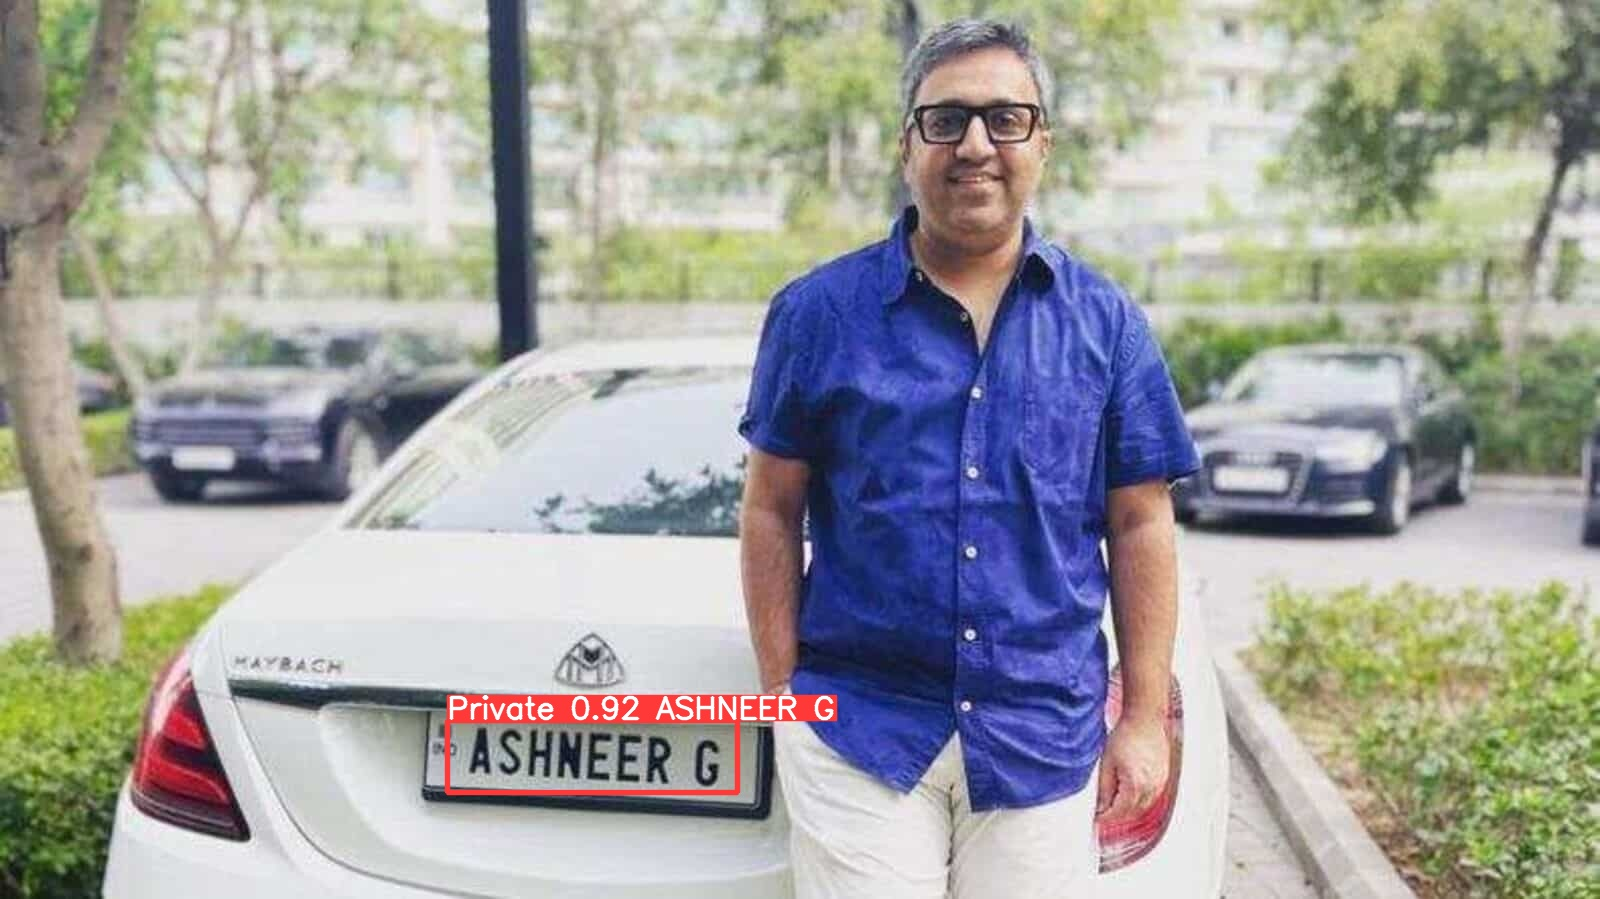

In [22]:
display.Image(filename='runs/detect/exp/test_img1.jpeg', width=600)

In [1]:
# Validate
!python3 val.py --weights runs/train/exp/weights/best.pt --data data/Nplate.yaml --img 640 --conf 0.50

val: data=data/Nplate.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.5, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 e233877 Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning '/home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/data/imagel
val: New cache created: /home/riyaz/Desktop/Nplate_project_1/Nplate_Detection/data/imagelabel/labels/val.cache
                 Class     Images  Instances          P          R     mAP@.5 mA
                   all         25         26        0.6      0.367      0.483      0.312
               Private         25          5          1        0.8        0.9       0.52
             Transport         25          6          1      0

## Detection using best weight form training(best.pt) and edited detect file

## Using soure 0 (camera)

`detect.py` runs YOLOv5 inference on a variety of sources. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image 
                          vid.mp4  # video
                          path/  # directory
                          'path/*.jpg'  # glob
                          'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                          'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

In [5]:
!python3 detect_test.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.03 --source index.jpeg # --save-txt --save-crop --visualize

detect_test: weights=['runs/train/exp/weights/best.pt'], source=index.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.03, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 e233877 Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/

In [36]:
from IPython.display import Video

Video('runs/detect/exp2/0.mp4')

In [37]:
# <video controls src="path/to/video.mp4" /> # as markdown

In [40]:
import pandas as pd

In [42]:
pd.read_csv('detection_results.csv')

,Image Name,Plate,Class
0,b55a6c64-28fd-11ed-b587-ab9686e1eae2.jpg,ASHNEER G,Private
1,3e581b38-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
2,3f868d50-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
3,40c79cd6-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
4,41f505f8-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
5,431fd1c4-28fe-11ed-b587-ab9686e1eae2.jpg,421 BH 2345 AAI,Private
6,4458a610-28fe-11ed-b587-ab9686e1eae2.jpg,421 BH 2345 AA,Private
7,458cf716-28fe-11ed-b587-ab9686e1eae2.jpg,21 BH 2345 AA,Private
8,4921f41c-28fe-11ed-b587-ab9686e1eae2.jpg,KL 31M 9090,Private
9,4a50efd2-28fe-11ed-b587-ab9686e1eae2.jpg,KL 31 M 9090,Private


##### note: we can adjust the confidance level during detection (with less confidance level it detects almost all number plates(class might be wrong)).
##### used only 35 random images from google for each class. still it work's well with multiclass detection
##### reading can be improved (here we used simple easyocr only)

## Detection using random youtube video

In [44]:
!python3 detect_test.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.65 --source 'https://www.youtube.com/watch?v=Z4eOnPTp2Aw' # --save-txt --save-crop --visualize

detect_test: weights=['runs/train/exp/weights/best.pt'], source=https://www.youtube.com/watch?v=Z4eOnPTp2Aw, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.65, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2e0b773 Python-3.10.4 torch-1.12.1+cu102 CPU

Fusing layers... 
Model summary: 213 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
1/1: https://www.youtube.com/watch?v=Z4eOnPTp2Aw...  Success (3807 frames 1280x720 at 25.00 FPS)

0: 384x640 (no detections), 124.1ms
0: 384x640 (no detections), 130.1ms
0: 384x640 (no detections), 128.3ms
0: 384x640 (no detections), 122.5ms
0: 384x640 (no detections), 113.3ms
0: 384x640 (no detections), 125.0ms
0: 384x640 (no detections), 108.1ms
0: 384x640 (no 

0: 384x640 (no detections), 110.0ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
19837
Private
0: 384x640 1 Private, 95.0ms
CUDA not available - defaul

19837
Private
0: 384x640 1 Private, 96.5ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
19837
Private
0: 384x640 1 Private, 91.2ms
CUDA not available -

19837
Private
0: 384x640 1 Private, 90.9ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
19837
Private
0: 384x640 1 Private, 79.5ms
CUDA not available -

19837
Private
0: 384x640 1 Private, 87.6ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
19837
Private
0: 384x640 1 Private, 101.0ms
CUDA not available 

46048
Private
0: 384x640 1 Private, 103.5ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
146048
Private
0: 384x640 1 Private, 101.1ms
CUDA not availabl

LNJ
Private
0: 384x640 1 Private, 84.4ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
LNJ
Private
0: 384x640 1 Private, 82.5ms
CUDA not available - def

0: 384x640 1 Private, 86.4ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
I7541l
Private
0: 384x640 1 Private, 95.7ms
0: 384x640 (no detections), 83.1m

0: 384x640 (no detections), 94.6ms
0: 384x640 (no detections), 106.1ms
0: 384x640 (no detections), 86.3ms
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/riyaz/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [46]:
Video('runs/detect/exp4/watch_v_Z4eOnPTp2Aw.mp4')